# Classification of MNIST dataset and traing a Radial Basis Function Neural Network and Classifing digits of my own handwriting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.chdir("D:\Datasets\Dataset-SC")

## Use Radial Basis Fuction (RBF) as a Explicit Kernel Method to map the input data. Now apply it to classify MNIST dataset.

In [2]:
import gzip
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 10000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

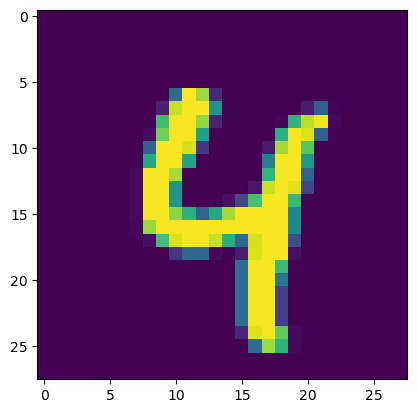

In [3]:
image = np.asarray(data[275]).squeeze()
plt.imshow(image)
plt.show()

## Define radial basis function (RBF) as def RBF(x, c, s): return np.exp(-np.sum((x-c)**2, axis=1)/(2*s**2)) where, x is the actual value, c is centre (assumed as mean) and s is the standard deviation.

In [4]:
def RBF(x, c, s):
    return np.exp(-np.sum((x - c)**2) / (2 * s**2))

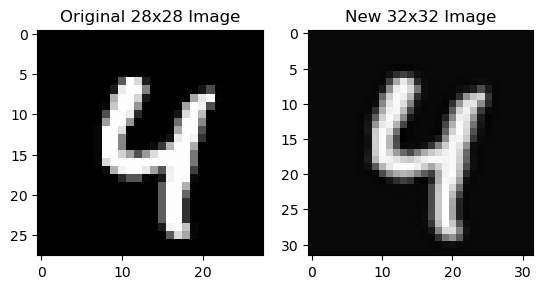

In [5]:
from scipy.interpolate import Rbf

original_image = data[275]

# coordinates for the 28x28 image
x, y = np.meshgrid(np.arange(28), np.arange(28))

# coordinates for the 32x32 output image
x_new, y_new = np.meshgrid(np.linspace(0, 27, 32), np.linspace(0, 27, 32))

# Reshaping the coordinates into 1D arrays
x = x.flatten()
y = y.flatten()
x_new = x_new.flatten()
y_new = y_new.flatten()

# Creating an RBF interpolator
rbf = Rbf(x, y, original_image.flatten(), function='linear')

# Interpolating to generate the new 32x32 image
new_image = rbf(x_new, y_new)
new_image = new_image.reshape(32, 32)

# Displaying the original and new images
plt.subplot(121)
plt.imshow(original_image,cmap='gray')
plt.title('Original 28x28 Image')

plt.subplot(122)
plt.imshow(new_image,cmap='gray')
plt.title('New 32x32 Image')

plt.show()

### Convert 28x28 image into 32x32 using rbf and store the new dataset with the labels.

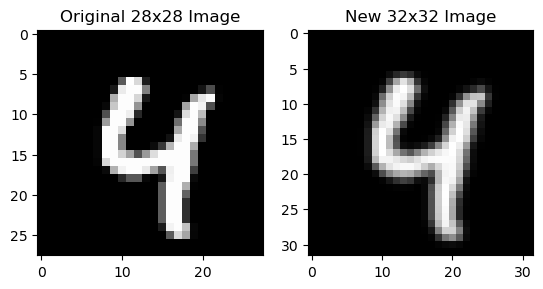

In [6]:
original_image = data[275]

# Defining the 28x28 and 32x32 coordinate grids
x_28 = np.arange(28)
y_28 = np.arange(28)
x_32 = np.linspace(0, 27, 32)
y_32 = np.linspace(0, 27, 32)

# Creating a mesh grid for both coordinate systems
x_28, y_28 = np.meshgrid(x_28, y_28)
x_32, y_32 = np.meshgrid(x_32, y_32)

# Standard deviation
s = 0.5

# Creating an empty 32x32 image
new_image = np.zeros((32, 32))

# Interpolating to generate the new 32x32 image using the RBF formula
for i in range(32):
    for j in range(32):
        for m in range(28):
            for n in range(28):
                center = np.array([m, n])
                new_image[i, j] += RBF([x_32[j, i], y_32[j, i]], center, s) * original_image[m, n]

# Displaying the original and new images
plt.subplot(121)
plt.imshow(original_image, cmap='gray')
plt.title('Original 28x28 Image')

plt.subplot(122)
plt.imshow(new_image, cmap='gray')
plt.title('New 32x32 Image')

plt.show()


In [7]:
g = gzip.open('t10k-labels-idx1-ubyte.gz','r')
buff = g.read()
out_hex = ['{:02X}'.format(b) for b in buff]
output = [int(i) for i in out_hex]
output = output[8:]
output[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

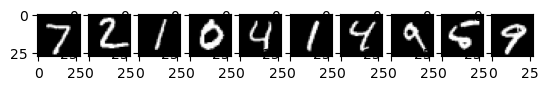

In [8]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(data[i], cmap='gray')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

inputs = [d.flatten() for d in data]

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='rbf', gamma='scale')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.35%


In [10]:
data32 = []
for num in range(len(data)):
    original_image = data[num]

    # coordinates for the 28x28 image
    x, y = np.meshgrid(np.arange(28), np.arange(28))

    # coordinates for the 32x32 output image
    x_new, y_new = np.meshgrid(np.linspace(0, 27, 32), np.linspace(0, 27, 32))

    # Reshaping the coordinates into 1D arrays
    x = x.flatten()
    y = y.flatten()
    x_new = x_new.flatten()
    y_new = y_new.flatten()

    # Creating an RBF interpolator
    rbf = Rbf(x, y, original_image.flatten(), function='linear')

    # Interpolating to generate the new 32x32 image
    new_image = rbf(x_new, y_new)
    new_image = new_image.reshape(32, 32)
    
    data32.append(new_image)

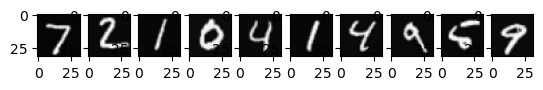

In [11]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(data32[i], cmap='gray')
plt.show()

In [12]:
inputs = [d.flatten() for d in data32]

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='rbf', gamma='scale')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.25%


## Compare the performance for RBF Kernel Classifier on hyperparameters like Standard Deviation Value, Time Taken(epoch), Output Dimension.

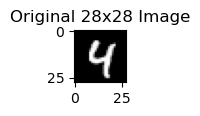

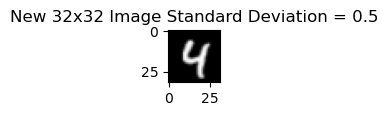

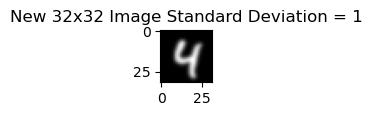

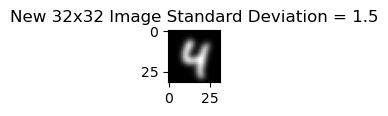

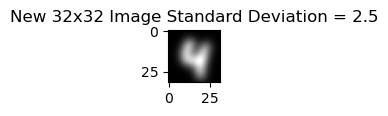

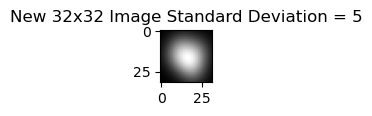

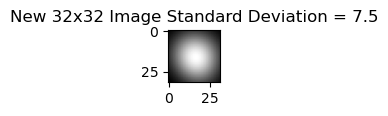

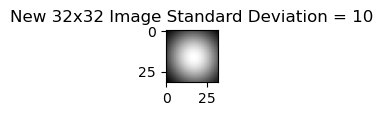

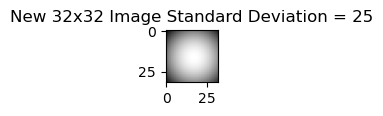

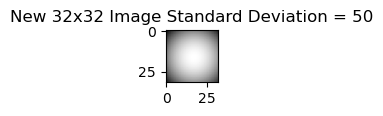

In [14]:
original_image = data[275]

# Defining the 28x28 and 32x32 coordinate grids
x_28 = np.arange(28)
y_28 = np.arange(28)
x_32 = np.linspace(0, 27, 32)
y_32 = np.linspace(0, 27, 32)

# Creating a mesh grid for both coordinate systems
x_28, y_28 = np.meshgrid(x_28, y_28)
x_32, y_32 = np.meshgrid(x_32, y_32)

# Standard deviation
s = [0.5,1,1.5,2.5,5,7.5,10,25,50]

ni = []

for sd in s:
    # Creating an empty 32x32 image
    new_image = np.zeros((32, 32))

    # Interpolating to generate the new 32x32 image using the RBF formula
    for i in range(32):
        for j in range(32):
            for m in range(28):
                for n in range(28):
                    center = np.array([m, n])
                    new_image[i, j] += RBF([x_32[j, i], y_32[j, i]], center, sd) * original_image[m, n]
                    
    ni.append(new_image)

# Displaying the original and new images
plt.figure(figsize=(8,8))
plt.subplot(10,1,1)
plt.imshow(original_image, cmap='gray')
plt.title('Original 28x28 Image')

for i in range(len(s)):
    plt.figure(figsize=(8,8))
    plt.subplot(10,1,i+2)
    plt.imshow(ni[i], cmap='gray')
    plt.title(f'New 32x32 Image Standard Deviation = {s[i]}')

plt.show()

## Activation Function Hidden Neurons 
### 1 Sigmoid [ 16] 
### 2 Sigmoid [16, 32] 
### 3 Sigmoid [16, 32, 64] 
## Try all the possible combinations.

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the architecture of the neural network
model_1sigmoid = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_2sigmoid = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_3sigmoid = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [46]:
inputs = [d.flatten() for d in data]
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [47]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_validation = np.array(X_validation)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_validation = np.array(y_validation)

In [48]:
# Compiling the model
model_1sigmoid.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training the model
history1 = model_1sigmoid.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Evaluating the model on the test set
test_loss1, test_accuracy1 = model_1sigmoid.evaluate(X_test, y_test)

print(f'Test accuracy for model 1sigmoid: {test_accuracy1 * 100:.2f}%')

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 5.6630 - accuracy: 0.1840 - val_loss: 2.0734 - val_accuracy: 0.2250
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 1.9663 - accuracy: 0.2679 - val_loss: 1.9215 - val_accuracy: 0.2840
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 1.8106 - accuracy: 0.3445 - val_loss: 1.9941 - val_accuracy: 0.3720
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 1.6597 - accuracy: 0.3926 - val_loss: 1.9244 - val_accuracy: 0.3880
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 1.5834 - accuracy: 0.4274 - val_loss: 1.7284 - val_accuracy: 0.3860
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 1.4533 - accuracy: 0.4604 - val_loss: 1.7663 - val_accuracy: 0.4440
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 1.3896 - accuracy: 0.4906 - val_loss: 1.7741 - val_accuracy: 0.4550
Epoch 

In [49]:
# Compiling the model
model_2sigmoid.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training the model
history2 = model_2sigmoid.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Evaluating the model on the test set
test_loss2, test_accuracy2 = model_2sigmoid.evaluate(X_test, y_test)

print(f'Test accuracy for model 2sigmoid: {test_accuracy2 * 100:.2f}%')

Epoch 1/10
250/250 [==============================] - 1s 4ms/step - loss: 4.1347 - accuracy: 0.1933 - val_loss: 2.1631 - val_accuracy: 0.2040
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 2.0114 - accuracy: 0.2421 - val_loss: 1.9559 - val_accuracy: 0.2640
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 1.7218 - accuracy: 0.3660 - val_loss: 1.6619 - val_accuracy: 0.3800
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 1.4860 - accuracy: 0.4369 - val_loss: 1.4862 - val_accuracy: 0.4500
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 1.3161 - accuracy: 0.5042 - val_loss: 1.3376 - val_accuracy: 0.5500
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 1.0710 - accuracy: 0.6309 - val_loss: 1.1574 - val_accuracy: 0.6540
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.8616 - accuracy: 0.7080 - val_loss: 0.9948 - val_accuracy: 0.6840
Epoch 

In [50]:
# Compiling the model
model_3sigmoid.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training the model
history3 = model_3sigmoid.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Evaluating the model on the test set
test_loss3, test_accuracy3 = model_3sigmoid.evaluate(X_test, y_test)

print(f'Test accuracy for model 3sigmoid: {test_accuracy3 * 100:.2f}%')

Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 2.8596 - accuracy: 0.3015 - val_loss: 1.7079 - val_accuracy: 0.4140
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 1.2584 - accuracy: 0.5684 - val_loss: 1.0898 - val_accuracy: 0.6160
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.8637 - accuracy: 0.7195 - val_loss: 0.8604 - val_accuracy: 0.7290
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.7228 - accuracy: 0.7724 - val_loss: 0.8035 - val_accuracy: 0.7500
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6020 - accuracy: 0.8189 - val_loss: 0.6349 - val_accuracy: 0.8110
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5341 - accuracy: 0.8405 - val_loss: 0.6122 - val_accuracy: 0.8290
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4578 - accuracy: 0.8575 - val_loss: 0.6165 - val_accuracy: 0.8460
Epoch 

## Plot the graph for each performance measure.

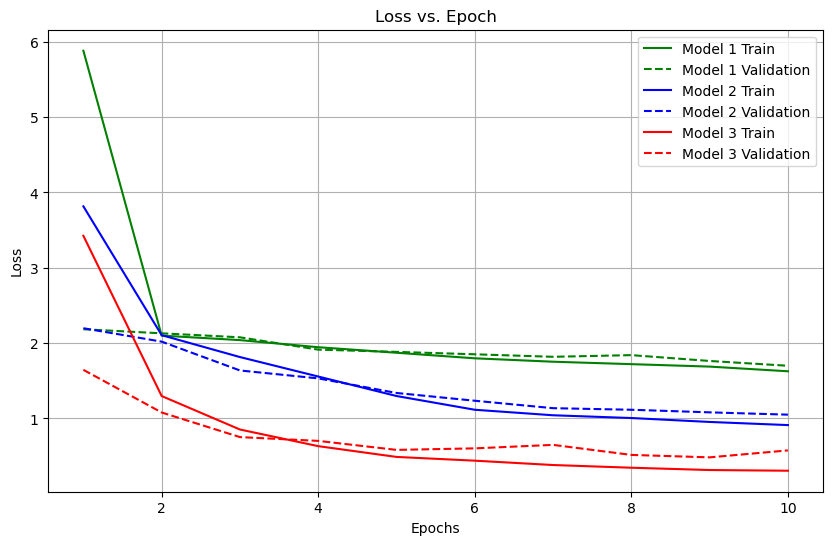

In [32]:
accuracy_1sigmoid = history1.history['loss']
val_accuracy_1sigmoid = history1.history['val_loss']

accuracy_2sigmoid = history2.history['loss']
val_accuracy_2sigmoid = history2.history['val_loss']

accuracy_3sigmoid = history3.history['loss']
val_accuracy_3sigmoid = history3.history['val_loss']

epochs = range(1, len(accuracy_1sigmoid) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_1sigmoid, 'g', label='Model 1 Train')
plt.plot(epochs, val_accuracy_1sigmoid, 'g', linestyle='dashed', label='Model 1 Validation')
plt.plot(epochs, accuracy_2sigmoid, 'b', label='Model 2 Train')
plt.plot(epochs, val_accuracy_2sigmoid, 'b', linestyle='dashed', label='Model 2 Validation')
plt.plot(epochs, accuracy_3sigmoid, 'r', label='Model 3 Train')
plt.plot(epochs, val_accuracy_3sigmoid, 'r', linestyle='dashed', label='Model 3 Validation')

plt.title('Loss vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

## Create five image(size 28*28) of your won containing a digit and test whether your trained classifier is able to predict it or not.

In [81]:
my_data = []

In [82]:
from PIL import Image
vals = []
num1 = Image.open("num_png/two28x28.png")
pixel_map = num1.load()
width, height = num1.size
for i in range(width): 
    for j in range(height):
        pix_val = pixel_map[i,j]
        vals.append(pix_val)
my_data.append(vals)
num1

In [83]:
vals = []
num1 = Image.open("num_png/three28x28.png")
pixel_map = num1.load()
width, height = num1.size
for i in range(width): 
    for j in range(height):
        pix_val = pixel_map[i,j]
        vals.append(pix_val)
my_data.append(vals)
num1

In [84]:
vals = []
num1 = Image.open("num_png/six28x28.png")
pixel_map = num1.load()
width, height = num1.size
for i in range(width): 
    for j in range(height):
        pix_val = pixel_map[i,j]
        vals.append(pix_val)
my_data.append(vals)
num1

In [85]:
vals = []
num1 = Image.open("num_png/seven28x28.png")
pixel_map = num1.load()
width, height = num1.size
for i in range(width): 
    for j in range(height):
        pix_val = pixel_map[i,j]
        vals.append(pix_val)
my_data.append(vals)
num1

In [86]:
vals = []
num1 = Image.open("num_png/nine28x28.png")
pixel_map = num1.load()
width, height = num1.size
for i in range(width): 
    for j in range(height):
        pix_val = pixel_map[i,j]
        vals.append(pix_val)
my_data.append(vals)
num1

In [87]:
vals = []
num1 = Image.open("num_png/one28x28.png")
pixel_map = num1.load()
width, height = num1.size
for i in range(width): 
    for j in range(height):
        r = pixel_map[i,j][0]
        vals.append(r)
my_data.append(vals)
num1

In [88]:
vals = []
num1 = Image.open("num_png/zero28x28.png")
pixel_map = num1.load()
width, height = num1.size
for i in range(width): 
    for j in range(height):
        r = pixel_map[i,j][0]
        vals.append(r)
my_data.append(vals)
num1

In [89]:
vals = []
num1 = Image.open("num_png/four28x28.png")
pixel_map = num1.load()
width, height = num1.size
for i in range(width): 
    for j in range(height):
        r = pixel_map[i,j][0]
        vals.append(r)
my_data.append(vals)
num1

In [91]:
my_labels = [2,3,6,7,9,1,0,4]

In [92]:
#Converting my data from 28x28 to 32x32
my_data32 = []
my_data = np.array(my_data)
for num in range(len(my_data)):
    original_image = my_data[num]

    # coordinates for the 28x28 image
    x, y = np.meshgrid(np.arange(28), np.arange(28))

    # coordinates for the 32x32 output image
    x_new, y_new = np.meshgrid(np.linspace(0, 27, 32), np.linspace(0, 27, 32))

    # Reshaping the coordinates into 1D arrays
    x = x.flatten()
    y = y.flatten()
    x_new = x_new.flatten()
    y_new = y_new.flatten()

    # Creating an RBF interpolator
    rbf = Rbf(x, y, original_image.flatten(), function='linear')

    # Interpolating to generate the new 32x32 image
    new_image = rbf(y_new, x_new)
    new_image = new_image.reshape(32, 32)
    
    my_data32.append(new_image)

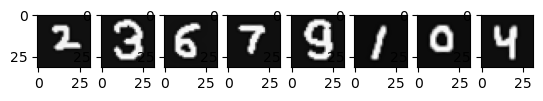

In [94]:
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(my_data32[i], cmap='gray')
plt.show()

In [95]:
#Retesting over my data in 32x32 res
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
inputs = [d.flatten() for d in data32]
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train = np.array(X_train)
imp = [md.flatten() for md in my_data32]
X_test = np.array(imp)
X_validation = np.array(X_validation)
y_train = np.array(y_train)
y_test = np.array(my_labels)
y_validation = np.array(y_validation)

# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Model accuracy for my data: {test_accuracy * 100:.2f}%')

Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 2.2164 - accuracy: 0.3996 - val_loss: 1.6011 - val_accuracy: 0.4440
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 1.1053 - accuracy: 0.6066 - val_loss: 0.9905 - val_accuracy: 0.6130
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.8782 - accuracy: 0.6685 - val_loss: 0.8287 - val_accuracy: 0.7190
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6857 - accuracy: 0.7555 - val_loss: 0.7076 - val_accuracy: 0.7730
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6058 - accuracy: 0.7971 - val_loss: 0.6910 - val_accuracy: 0.7860
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5493 - accuracy: 0.8131 - val_loss: 0.6981 - val_accuracy: 0.7830
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5411 - accuracy: 0.8196 - val_loss: 0.6390 - val_accuracy: 0.8160
Epoch 